In [26]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import reg_lin

import sklearn.linear_model as linear_model
from sklearn.metrics import mean_squared_error, r2_score

# On charge le dataset
house_data = pd.read_csv('house.csv')

def norme(theta):
    return np.sqrt(theta.item(0)**2 + theta.item(1)**2)

def add_noise(matrix, var=10):
    return np.random.normal(matrix,var)

def newline():
    print('\n')
    
def mse(y_hat, y):
    error = y_hat - y
    n = np.shape(y)[0]
    return error.T.dot(error) / n

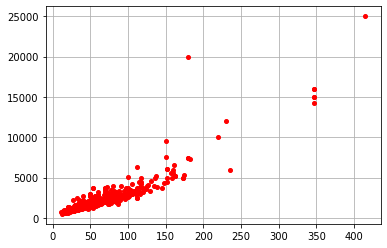

In [27]:
# On affiche le nuage de points dont on dispose
def show():
    plt.plot(house_data['surface'], house_data['loyer'], 'ro', markersize=4)
    plt.grid()
    plt.show()
    return 0

show()

house_data = house_data[house_data['loyer'] < 10000]

# On décompose le dataset et on le transforme en matrices pour pouvoir effectuer notre calcul
X = np.matrix([np.ones(house_data.shape[0]), house_data['surface']]).T
y = np.matrix(house_data['loyer']).T

n, p = X.shape
p = p - 1 # on retrouve ici le nombre de variable explicatif

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


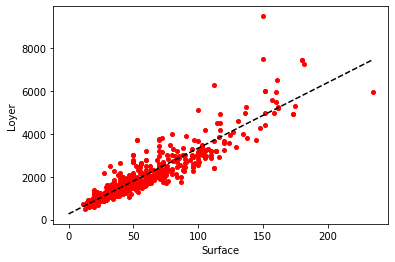



Theta estimé
[[266.45460292]
 [ 30.66119596]]
norme de theta:  268.2129086237212


Le MSE obtenu sur les prédictions
[[257174.0046004]]


Le RMSE obtenu sur les prédictions
[[507.12326371]]


Le MSE_relatif obtenu sur les prédictions
[[0.03560893]]


Le MAE_relatif_ obtenu sur les prédictions
[[0.14981943]]


La variance estimée des résidus, càd sigma = 
258137.20311950656


La matrice de covariance des coefficients theta est
[[ 1.78960764e+03 -2.21276509e+01]
 [-2.21276509e+01  3.74334708e-01]]


Nous avons alors les coefficients theta
[[266.45460292]
 [ 30.66119596]]


Nous avons les écart-types
[42.30375443  0.61182899]


Nous affichons la distribution des erreurs/résidus selon la surface


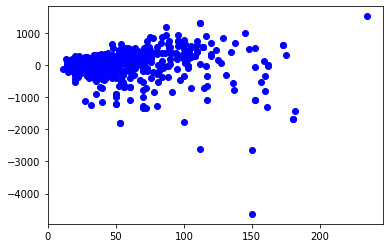

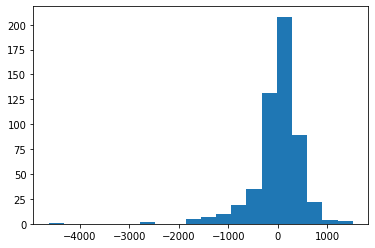



La p-value pour le test de normalité du test de shapiro pour les résidus
1.9297582469172282e-23
L'hypothèse de normalité des résidus est donc rejetée


In [29]:
%load_ext autoreload
%autoreload 2
import helper
import scipy.stats as stats

def display_theta_info(theta):
        newline()
        print("Theta estimé")
        print(theta)
        print("norme de theta: ", norme(theta))

def fit_method(method):
    def fitter(X,y, x_axis=[0, 250]):
        # On effectue le calcul exact du paramètre theta
        theta = method(X, y)
        show_regression(theta, X)
        display_theta_info(theta)

        y_hat = X.dot(theta)
        error_hat = y_hat - y
        return theta, y_hat, error_hat
    return fitter

fit_lin = fit_method(reg_lin.custom_reg_lin)

def show_regression(theta, X):
    surface_rescaled_if_needed = X[:, 1]
    x_axis = [0, np.max(surface_rescaled_if_needed)]
    y_axis = [theta.item(0), theta.item(0) + x_axis[1] * theta.item(1)]
    plt.figure()
    plt.xlabel('Surface')
    plt.ylabel('Loyer')

    plt.plot(surface_rescaled_if_needed.A1, house_data['loyer'], 'ro', markersize=4)
    # On affiche la droite entre 0 et 250
    # plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='--', c='#000000')
    plt.plot(x_axis, y_axis, linestyle='--', c='#000000')
    plt.show()
    return 0

def predict(X, y, theta):
    n, p = X.shape
    p = p - 1 # on retrouve ici le nombre de variable explicatif

    y_hat = X.dot(theta)
    error_hat = y_hat - y

    return y_hat, error_hat

def display_metrics(error_hat, y):
    mse, rmse = helper.get_MSE(error_hat)
    ## On test à avoir le MSE des erreur relatifs
    helper.get_MSER(error_hat, y)

    ## On test à avoir la moyenne des erreur relatifs absolus : MAE
    helper.get_MAER(error_hat, y)

# Estimation de la variance des résidus. Càd estimation de sigma.
def get_var_residus(theta, X, error_hat):
    n, p = X.shape
    p = p - 1 # on retrouve ici le nombre de variable explicatif
    norme_carre_error_hat = error_hat.T.dot(error_hat) 
    # il s'agit de l'estimateur sans biais de la variance
    var_hat = (1 / (n - p - 1) * norme_carre_error_hat).item()
    newline()
    print("La variance estimée des résidus, càd sigma = ")
    print(var_hat)

    # On peut ensuite observer la matrice de covariance des coefficients theta estimés. Et on peut ainsi récupérer les variances de chaque coefficient theta 

    covar_theta = var_hat * np.linalg.inv(X.T.dot(X))
    sigma_theta = np.sqrt(np.diag(covar_theta))

    newline()
    print("La matrice de covariance des coefficients theta est")
    print(covar_theta)

    newline()
    print('Nous avons alors les coefficients theta')
    print(theta)
    newline()
    print('Nous avons les écart-types')
    print(sigma_theta)
    # Il est possible de déterminer la loi de distribution des coefficients theta.
    # Avec la loi, il est possible de déterminer des intervalles de confiance pour chaque coefficient theta

    return var_hat, covar_theta, sigma_theta


def residus_test(error_hat):
    # Etude des résidus
    newline()
    print('Nous affichons la distribution des erreurs/résidus selon la surface')
    plt.scatter(house_data['surface'], error_hat.A1, color='blue') # Les résidus ne semblent pas totalement indépendants de la surface

    plt.figure()
    plt.hist(error_hat.A1, bins=20)
    plt.show()

    test_normalite_residu = stats.shapiro(error_hat.A1)
    p_value = test_normalite_residu[1]
    newline()
    print("La p-value pour le test de normalité du test de shapiro pour les résidus")
    print(p_value)
    if p_value < 0.05:
        print("L'hypothèse de normalité des résidus est donc rejetée")
    else:
        print("L'hypothèse de normalité des résidus n'est donc pas rejetée")
    return p_value


def info_pipeline(X, y, error_hat, theta):
    display_metrics(error_hat, y)
    var_hat, covar_theta, sigma_theta = get_var_residus(theta, X, error_hat)
    residus_test(error_hat)

def fit_and_get_info(fitter, X, y, x_axis=[0, 250]):
    theta, y_hat, error_hat = fitter(X,y, x_axis)
    info_pipeline(X, y, error_hat, theta)
    return theta, y_hat, error_hat

_ = fit_and_get_info(fit_lin, X, y)





Bruit de variance ajouté: 1e-05
Colinéarité avec surface
surface          1.0
surface_noise    1.0
Name: surface, dtype: float64


Valeurs propres de notre matrice bruitée
[5.12537575e+06 1.44231321e+02 2.27070666e-08]


theta_col
[[ 2.85672929e+02]
 [-2.18047967e+06]
 [ 2.18051022e+06]]
norme de theta_col:  2180479.691674628


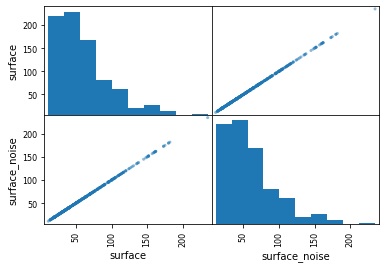

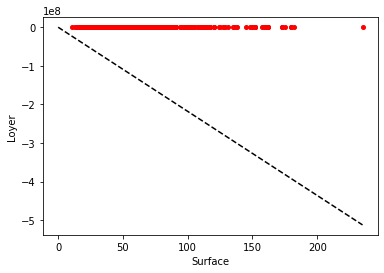



Bruit de variance ajouté: 0.1
Colinéarité avec surface
surface          1.000000
surface_noise    0.999996
Name: surface, dtype: float64


Valeurs propres de notre matrice bruitée
[5.12527173e+06 1.44225437e+02 2.75517822e+00]


theta_col
[[ 267.79125126]
 [ 364.68859708]
 [-334.05088982]]
norme de theta_col:  452.4488115671309


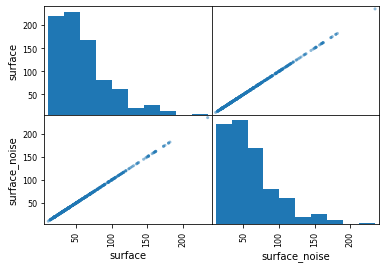

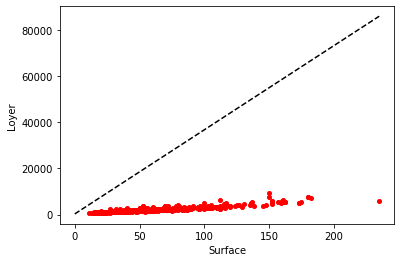



Bruit de variance ajouté: 1
Colinéarité avec surface
surface          1.000000
surface_noise    0.999573
Name: surface, dtype: float64


Valeurs propres de notre matrice bruitée
[5.12822801e+06 1.40556366e+02 3.00910792e+02]


theta_col
[[269.25237088]
 [ 41.94249408]
 [-11.31025658]]
norme de theta_col:  272.4995633622054


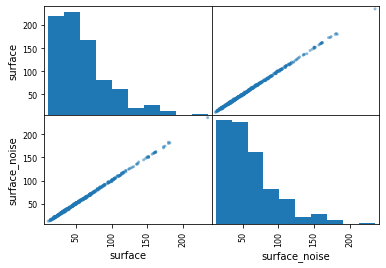

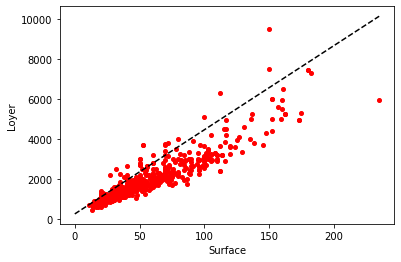



Bruit de variance ajouté: 10
Colinéarité avec surface
surface          1.000000
surface_noise    0.963358
Name: surface, dtype: float64


Valeurs propres de notre matrice bruitée
[5.14790200e+06 1.44205321e+02 2.66905470e+04]


theta_col
[[266.52121182]
 [ 30.29782602]
 [  0.3628576 ]]
norme de theta_col:  268.23779489446184


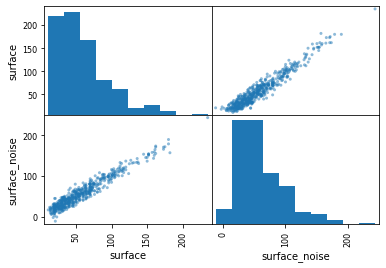

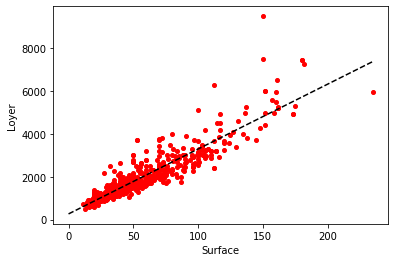



Bruit de variance ajouté: 100
Colinéarité avec surface
surface          1.00000
surface_noise    0.30957
Name: surface, dtype: float64


Valeurs propres de notre matrice bruitée
[8.74669983e+06 1.44054569e+02 1.54371893e+06]


theta_col
[[ 2.67362583e+02]
 [ 3.07870107e+01]
 [-1.39894017e-01]]
norme de theta_col:  269.12931977910864


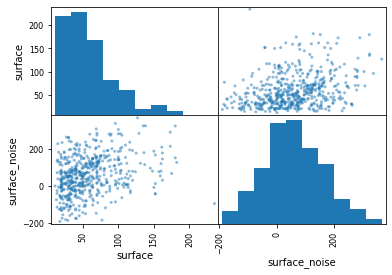

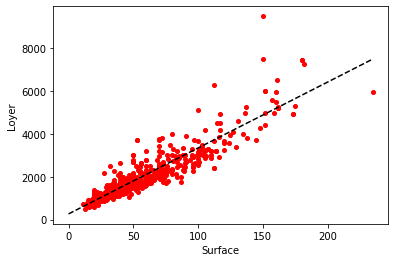



Bruit de variance ajouté: 1000
Colinéarité avec surface
surface          1.000000
surface_noise    0.125746
Name: surface, dtype: float64


Valeurs propres de notre matrice bruitée
[1.43185501e+02 2.53540200e+06 5.55846355e+08]


theta_col
[[2.67857440e+02]
 [3.06309417e+01]
 [8.48306608e-03]]
norme de theta_col:  269.6031574298924


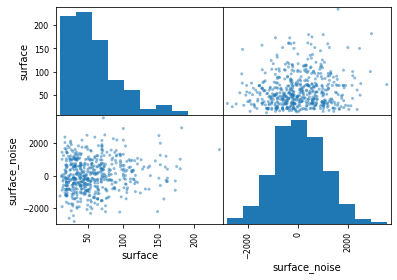

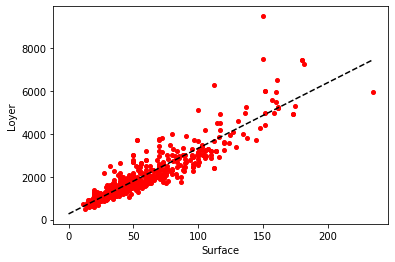



Bruit de variance ajouté: 100000
Colinéarité avec surface
surface          1.000000
surface_noise   -0.091378
Name: surface, dtype: float64


Valeurs propres de notre matrice bruitée
[5.47368949e+12 1.43752373e+02 2.54545931e+06]


theta_col
[[ 2.66993580e+02]
 [ 3.06486570e+01]
 [-4.87463955e-05]]
norme de theta_col:  268.7469288438032


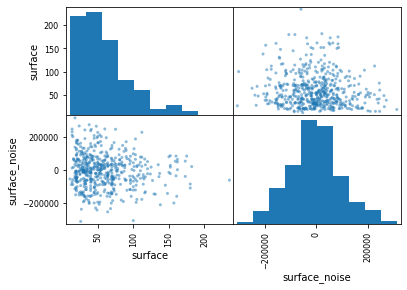

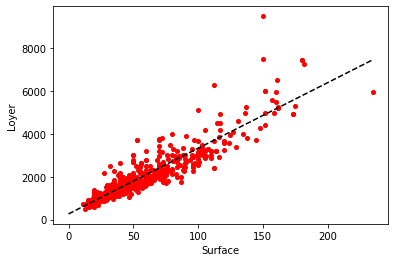

In [30]:
# Nous n'avions auparavant qu'une seule variable explicative. On ajoute une autre variable qui est colinéaire à notre 1ère variable
# Comme avoir une colinéarité parfaite entraine un déterminant de 0, et donc une erreur, nous allons utiliser une colinéarité proche

def show_colinearite(var):
    X_col = np.matrix([
        np.ones(house_data.shape[0]), house_data['surface'],
        add_noise(house_data['surface'], var)
    ]).T


    # Observons les colinéarités entre variables
    df = pd.DataFrame(X_col[:,1:3], columns=["surface", 'surface_noise'])
    corr_matrix = df.corr()
    newline()
    print('Bruit de variance ajouté:', var)
    print('Colinéarité avec surface')
    print(corr_matrix['surface']) # On voit qu'il y a une très forte colinéarité entre surface et surface_noise
    pd.plotting.scatter_matrix(df)


    # Observons les valeurs propres de la matrice quadratique
    propres,_ = np.linalg.eig(X_col.T.dot(X_col))
    newline()
    print('Valeurs propres de notre matrice bruitée')
    print(propres)

    # On effectue le calcul exact du paramètre theta
    theta_col = reg_lin.custom_reg_lin(X_col, y)
    newline()
    print("theta_col")
    print(theta_col)
    print("norme de theta_col: ", norme(theta_col))

    show_regression(theta_col, X_col)
    
show_colinearite(0.00001) 
show_colinearite(0.1)
show_colinearite(1)
show_colinearite(10)
show_colinearite(100)
show_colinearite(1000)
show_colinearite(100000)



# Observations


Nous voyons d'après le résultat précédent que la présence de colinéarité diminue la performance de notre modèle. On remarque plusieurs impacts:
- 1) Il existe des valeurs propres à valeur très faible dans notre matrice quadratique. Il faut les comparer relativement au bruit que l'on ajoute. Mais pour des colinéarité très forte (ici, on ajoute du bruit de l'ordre de 1% ou moins), il y a des valeurs propres très faible
- 2) Cette diminution des valeurs propres entraine une augmentation de la norme de theta. Et comme la norme de theta est liée au MSE de theta, les valeurs de theta explose, comme convenue d'après la théorie.

Remarque: Plus les variables sont indépendantes, et moins ces effets s'appliquent.

In [7]:
import scipy.stats as stats
## FAIL, on obtient des valeurs beaucoup trop grande. Est-ce que c'est dû à la variance estimée qui est mauvaise ?
# Comme (theta_j_hat - theta_j) / sigma_theta_j_hat  ~  loi Student(n-p-1), on peut définir un intervalle de confiance à 95%
q1, q2 = stats.t(df=n - p - 1).ppf((0.025, 0.975))

IC = [theta - q2 * var_hat / np.sqrt(n-p-1), theta + q2 * var_hat / np.sqrt(n-p-1)]

newline()
print("L'intervalle de confiance des theta")
print(IC)


NameError: name 'theta' is not defined

# Observations sur le plan d'expérience

On a vu que la matrice de covariance des theta dépend de la matrice d'observations X et de sa forme quadratique. On peut donc jouer sur la matrice d'observations afin de diminuer la variance des coefficients theta.

# Etude de la validité statistique du modèle

Nous avons vu qu'il est possible de :
- estimer la variance des résidus
- déterminer la loi de distribution des coefficients theta et de réaliser des intervalles de confiance
- observer des grandeurs indicatives de la validité du modèle, notamment R² ajusté, et le test de non-nullité total. (càd tous les coeff nuls)
https://fr.m.wikipedia.org/wiki/R%C3%A9gression_lin%C3%A9aire_multiple

Nous allons utiliser scikit-learn pour faire ça car il fait déjà tout.

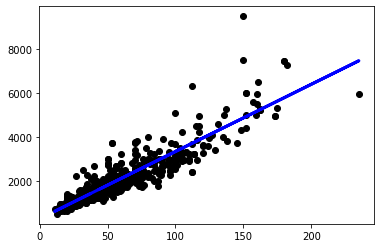

Coefficients: 
 [ 0.         30.66119596]
Intercept: 
 266.4546029150554
Mean squared error of prediction: 257174.00
Root Mean squared error of prediction: 507.12
Coefficient of determination: 0.8246543068110017
R2_ajusté: 0.824325944089674


In [77]:
import matplotlib.pyplot as plt
import numpy as np

# Create linear regression object
regr = linear_model.LinearRegression()

def scitkit_fit(model, X, y):
# Train the model using the training sets
      model.fit(X, y.A1) # En fait, scikit n'a pas besoin de la première colonne de 1.
      y_predict = model.predict(X)

      plt.scatter(house_data['surface'], y.A1,  color='black')
      plt.plot(house_data['surface'], y_predict, color='blue', linewidth=3)

      plt.show()

      # The coefficients
      # Le coefficient 0 correspond au coefficient de la colonne de 1 inutile.
      print('Coefficients: \n', model.coef_)
      # The intercept
      print('Intercept: \n', model.intercept_)
      # The mean squared error
      print('Mean squared error of prediction: %.2f'
            % mean_squared_error(y, y_hat))
      # The coefficient of determination: 1 is perfect prediction. R²
      print('Root Mean squared error of prediction: %.2f'
            % np.sqrt(mean_squared_error(y, y_hat)))
      # The coefficient of determination: 1 is perfect prediction. R²
      R2 = r2_score(y, y_hat)
      R2_ajuste = 1 - (1 - R2) * (n-1)/(n-p-1)
      print('Coefficient of determination:', R2)
      print('R2_ajusté:', R2_ajuste)
      return y_predict, model.coef_

_ = scitkit_fit(regr, X, y)


In [15]:
# Nous allons observer les capacités d'un modèle linéaire par Cross validation
from sklearn.model_selection import cross_val_score
cross_val_model = linear_model.LinearRegression()

def get_cross_val(model, X, y):
    scores = cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)

    def display_scores(scores):   
        newline()
        print("Scores:", scores)
        print("Moyenne des scores:", scores.mean())
        print("Ecart-type des scores:", scores.std())

    display_scores(rmse_scores)

    return rmse_scores

rmse_scores = get_cross_val(cross_val_model, X, y)

# Nous pouvons observer que le MSE dépend beaucoup du set d'entrainement choisi, les valeurs prennent des valeurs très éloignées. On voit notamment que l'ecart-type est de l'ordre de grandeur de la moyenne, ce qui montre que le modèle linéaire est très sensible aux valeurs aberrantes.



Scores: [230.29248615 379.18307059 811.82889688 572.25111825 458.76946684
 694.1447052  623.52058516 344.30310043 509.58791924 263.62694798]
Moyenne des scores: 488.750829672133
Ecart-type des scores: 179.8293777380069


# Régression Ridge

On observe ici que la régression ridge n'apporte pas grand chose, la norme de theta était probablement déjà suffisamment contrôlée dans la régression simple

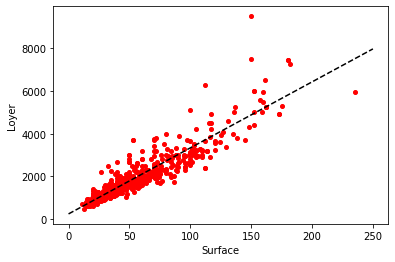



Theta estimé
[[247.39956785]
 [ 30.89571641]]
norme de theta:  249.32126155592562


Le MSE obtenu sur les prédictions
[[257271.7221464]]


Le RMSE obtenu sur les prédictions
[[507.21959953]]


Le MSE_relatif obtenu sur les prédictions
[[0.03534402]]


Le MAE_relatif_ obtenu sur les prédictions
[[0.14929838]]


La variance estimée des résidus, càd sigma = 
258235.28664881756


La matrice de covariance des coefficients theta est
[[ 1.79028763e+03 -2.21360587e+01]
 [-2.21360587e+01  3.74476943e-01]]


Nous avons alors les coefficients theta
[[247.39956785]
 [ 30.89571641]]


Nous avons les écart-types
[42.31179068  0.61194521]


Nous affichons la distribution des erreurs/résidus selon la surface


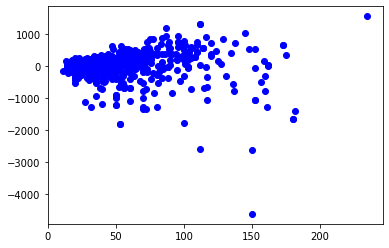

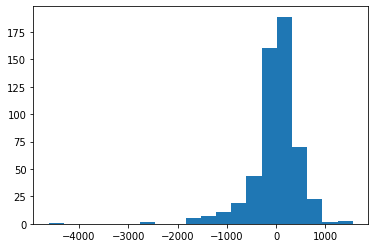



La p-value pour le test de normalité du test de shapiro pour les résidus
4.0451540819503236e-23
L'hypothèse de normalité des résidus est donc rejetée


In [89]:
# Nous allons implémenter notre propre régression ridge (et non celle de scikit) et comparer avec notre custom_reg_lin car on ne sais pas si le modèle de scikit faisait déjà de la régression ridge ou non.

# alpha = 1
# ridge_regr = linear_model.Ridge(alpha=alpha)
# y_ridge, theta_ridge = scitkit_fit(ridge_regr, X, y)
# display_theta_info(theta_ridge)

alpha = 10
fit_ridge = fit_method(lambda X, y: reg_lin.custom_reg_ridge(X, y, alpha))

_ = fit_and_get_info(fit_ridge, X, y)

#  Le RMSE obtenu sur les prédictions de la régression classique
#  [[507.12326371]]

# Et si on changeait l'échelle de nos variables explicatives : Régression simple

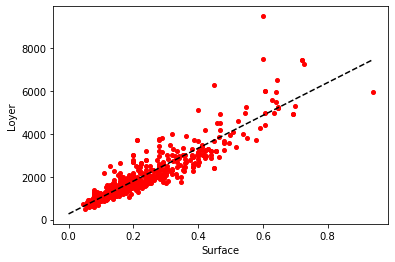



Theta estimé
[[ 266.45460292]
 [7665.29899032]]
norme de theta:  7669.928726295704


Le MSE obtenu sur les prédictions
[[257174.0046004]]


Le RMSE obtenu sur les prédictions
[[507.12326371]]


Le MSE_relatif obtenu sur les prédictions
[[0.03560893]]


Le MAE_relatif_ obtenu sur les prédictions
[[0.14981943]]


La variance estimée des résidus, càd sigma = 
258137.20311950656


La matrice de covariance des coefficients theta est
[[ 1789.6076392  -5531.91272795]
 [-5531.91272795 23395.9192509 ]]


Nous avons alors les coefficients theta
[[ 266.45460292]
 [7665.29899032]]


Nous avons les écart-types
[ 42.30375443 152.95724648]


Nous affichons la distribution des erreurs/résidus selon la surface


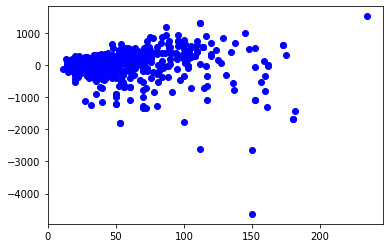

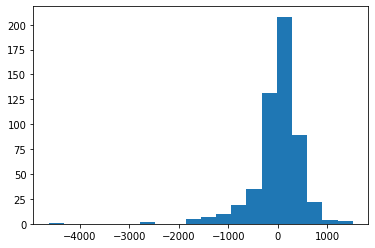



La p-value pour le test de normalité du test de shapiro pour les résidus
1.9297582469172282e-23
L'hypothèse de normalité des résidus est donc rejetée


       [2106.12636059],
         [2872.65625962],
         [3639.18615866],
         [3179.26821924],
         [3363.23539501],
         [3025.96223943],
         [3332.57419904],
         [3332.57419904],
         [2474.06071213],
         [3761.8309425 ],
         [3639.18615866],
         [3639.18615866],
         [3485.88017885],
         [3363.23539501],
         [3179.26821924],
         [3577.86376673],
         [3424.55778693],
         [2658.0278879 ],
         [3945.79811827],
         [3332.57419904],
         [3700.50855058],
         [4712.3280173 ],
         [3853.81453039],
         [4283.07127384],
         [3853.81453039],
         [5570.84150422],
         [3332.57419904],
         [5233.56834864],
         [5233.56834864],
         [4926.95638903],
         [5632.16389614],
         [7471.83565382],
         [5785.46987595],
         [ 603.72775849],
         [ 695.71134637],
         [ 818.35613022],
         [ 757.0337383 ],
         [1032.98450195],
         [1002

In [31]:
facteur_echelle = 1 / 250
x_axis = [0, 1]
X_echelle = np.matrix([
    np.ones(house_data.shape[0]), 
    facteur_echelle * house_data['surface']
]).T

fit_and_get_info(fit_lin, X_echelle, y)

# On voit que le RMSE ne change pas vraiment.
